In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Question
  -  What are the factors that contribute to malignant and benign tumor?
  -  Is the problem stated as classification or regression problem?
  -  Our final model is capable enough to predict the diffence between two types?

# Step 2: Wrangling(Munging) Data

Step 2.1: Gathering Data

In [2]:
df = pd.read_csv("data.csv")

Step 2.2: Accessing Data

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Step 2.3: Cleaning Data

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.drop(columns=['Unnamed: 32'], inplace=True)

# Step 3: EDA

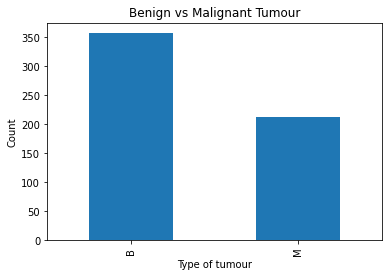

In [8]:
df.diagnosis.value_counts().plot(kind= 'bar');
plt.title('Benign vs Malignant Tumour')
plt.xlabel('Type of tumour')
plt.ylabel('Count');

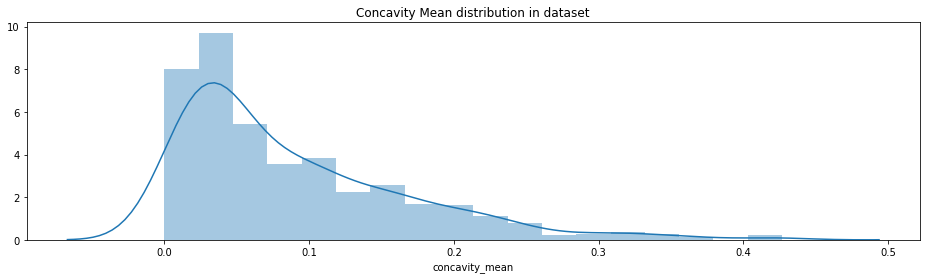

In [9]:
fig, ax = plt.subplots(figsize =(16,4))
#df.concavity_mean.plot()
sns.distplot(df.concavity_mean)
plt.title('Concavity Mean distribution in dataset');

In [10]:
malignant = df[df.diagnosis == 'M']
benign = df[df.diagnosis == 'B']

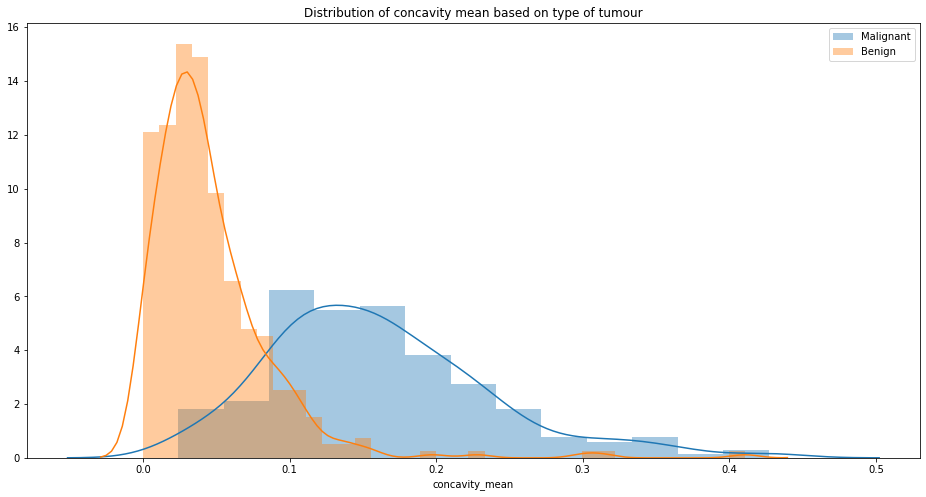

In [11]:
fig, ax = plt.subplots(figsize =(16,8))
sns.distplot(malignant.concavity_mean, label='Malignant')
sns.distplot(benign.concavity_mean, label='Benign')
plt.title('Distribution of concavity mean based on type of tumour')
plt.legend()

Step 4: Model Data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
## Seperate out features and labels

X = df.drop(columns=['diagnosis'])
y = df.diagnosis

In [14]:
## Set aside Training and test data for validation of our model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state = 42)

In [15]:
## checking out shape of the variables for traiing and test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((512, 31), (512,), (57, 31), (57,))

In [16]:
## Since machines understand language of either 0 or 1, you have to provide them data in that language only.
## So convert M to 0 and B to 1

le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
## validating the changed values in y
## After applying scikit learn operations the values are converted to numpy arrays

np.unique(y)

array([0, 1])

In [18]:
## Modelling data with logistic regression

lr = LogisticRegression() ## creating object with default parameters

lr.fit(X_train, y_train) ## fit will assign weights to all parameters and will return a model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Step 5: Evaluating Model

In [19]:
y_pred = lr.predict(X_test) ## we perform prediction on the validation set kept aside in step 4

Metric for evaluation: Confusion Matrix

In [20]:
confusion_matrix( y_test, y_pred) ## for validation set

array([[40,  0],
       [17,  0]], dtype=int64)

In [21]:
confusion_matrix(lr.predict(X_train), y_train) ## for training set

array([[317, 195],
       [  0,   0]], dtype=int64)

Step 6: Deciding Hyperparameters

After analyzing the performance on the validation and training set we conclude that we are underfitting the model

Step 7: Trying out other Models

In [22]:
## Now fitting the same data with random forest instead of Logistic Regression.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

0.9649122807017544

Run steps 5 to 6 again

In [24]:
confusion_matrix(y_pred, y_test) ## On validation set

array([[39,  1],
       [ 1, 16]], dtype=int64)

In [25]:
confusion_matrix(rf.predict(X_train), y_train) ## On training set

array([[317,   0],
       [  0, 195]], dtype=int64)

Step 8: Finding Important Features

In [26]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [27]:
feature_importances

,importance
concave points_mean,0.157727
concave points_worst,0.129784
perimeter_worst,0.106524
radius_worst,0.099859
area_worst,0.075191
perimeter_mean,0.064419
area_se,0.042992
concavity_mean,0.042900
concavity_worst,0.041238
radius_mean,0.038738


Step 9: Conclusion:
 - What are the factors that contribute to malignant and benign tumor? : Answer Given in Step 8
 - Is the problem stated as classification or regression problem?: Classification
 - Our final model is capable enough to predict the diffence between two types?: Our model is more than >94% accurate